In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, Callback, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

from multilabel_multiclass_classifier_net import MultiLabelMutliClassifierNet
from dataset_loader import Dataset_loader


In [2]:
# Load Dataset
flixstock_data = Dataset_loader()
(data_set, classes) = flixstock_data.custom_data_loader()
(train_x, test_x, 
 train_neck_y, test_neck_y,
 train_sleeves_y, test_sleeves_y, 
 train_pattern_y, test_pattern_y) = data_set

neck_lb, sleeves_lb, pattern_lb = classes
print('image_size: ', train_x.shape)
print('train data len:', train_x.shape[0], 'test data len:', test_x.shape[0])
print('neck_classes', len(neck_lb.classes_))
print('sleeve_classes', len(sleeves_lb.classes_))
print('pattern_classes', len(pattern_lb.classes_))

unique rows 3564
image_size:  (2851, 300, 225, 3)
train data len: 2851 test data len: 713
neck_classes 8
sleeve_classes 5
pattern_classes 11


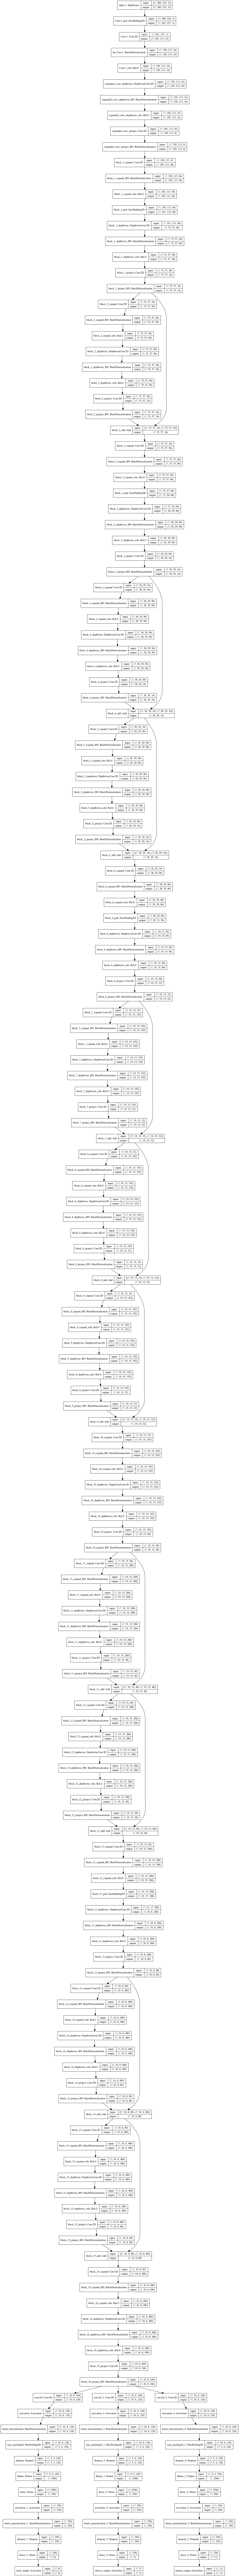

In [3]:
# Compile model
input_shape = (300, 225, 3)
net = MultiLabelMutliClassifierNet(input_shape, 
                 num_neck_classes=len(neck_lb.classes_), 
                 num_sleeves_classes=len(sleeves_lb.classes_), 
                 num_pattern_classes=len(pattern_lb.classes_))

# Define loss and loss weight (if any)
losses = {
    "pattern_output": "categorical_crossentropy",
    "sleeves_output": "categorical_crossentropy",
    "neck_output": "categorical_crossentropy"
}
lossWeights = {"neck_output": 1.0, "sleeves_output": 1.0, "pattern_output": 1.0}

EPOCHS = 50
INIT_LR = 1e-3

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

net.compile(losses=losses, lossWeights=lossWeights, opt=opt)

# Plot model
plot_model(net.model, show_shapes = True)

In [4]:
# Callback
CHECKPOINT="checkpoints_21-06/classification_epoch_{epoch:02d}_valloss_{val_loss:.2f}.h5"
checkpoint = ModelCheckpoint(CHECKPOINT, monitor='val_pattern_output_accuracy', verbose=1, save_weights_only=False , save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=2, min_lr=0.00001, verbose=1)
callbacks_list = [checkpoint, reduce_lr]

# Training parameters
train_x = train_x
train_y = {"neck_output": train_neck_y, "sleeves_output": train_sleeves_y, 'pattern_output':train_pattern_y}
val_x = test_x
val_y = {"neck_output": test_neck_y, "sleeves_output": test_sleeves_y, 'pattern_output':test_pattern_y}
epochs = EPOCHS
batch_size=32

In [5]:
# Train network
net.train(train_x,
          train_y,
          val_x,
          val_y,
          epochs,
          batch_size=batch_size,
          callbacks=callbacks_list)

Epoch 1/50
90/90 [==============================] - ETA: 0s - loss: 7.2468 - neck_output_loss: 2.5919 - sleeves_output_loss: 1.9666 - pattern_output_loss: 2.6883 - neck_output_accuracy: 0.2427 - sleeves_output_accuracy: 0.3458 - pattern_output_accuracy: 0.2571
Epoch 00001: val_pattern_output_accuracy improved from -inf to 0.13184, saving model to checkpoints_21-06/classification_epoch_01_valloss_8.61.h5
90/90 [==============================] - 53s 594ms/step - loss: 7.2468 - neck_output_loss: 2.5919 - sleeves_output_loss: 1.9666 - pattern_output_loss: 2.6883 - neck_output_accuracy: 0.2427 - sleeves_output_accuracy: 0.3458 - pattern_output_accuracy: 0.2571 - val_loss: 8.6112 - val_neck_output_loss: 2.3262 - val_sleeves_output_loss: 2.7729 - val_pattern_output_loss: 3.5121 - val_neck_output_accuracy: 0.3801 - val_sleeves_output_accuracy: 0.2412 - val_pattern_output_accuracy: 0.1318
Epoch 2/50
90/90 [==============================] - ETA: 0s - loss: 4.6713 - neck_output_loss: 1.8207 - sle

90/90 [==============================] - 51s 564ms/step - loss: 1.8247 - neck_output_loss: 0.7762 - sleeves_output_loss: 0.5945 - pattern_output_loss: 0.4540 - neck_output_accuracy: 0.7201 - sleeves_output_accuracy: 0.7622 - pattern_output_accuracy: 0.8369 - val_loss: 3.1602 - val_neck_output_loss: 1.3717 - val_sleeves_output_loss: 0.8999 - val_pattern_output_loss: 0.8886 - val_neck_output_accuracy: 0.5498 - val_sleeves_output_accuracy: 0.6452 - val_pattern_output_accuracy: 0.7153
Epoch 11/50
90/90 [==============================] - ETA: 0s - loss: 1.6340 - neck_output_loss: 0.7120 - sleeves_output_loss: 0.5122 - pattern_output_loss: 0.4098 - neck_output_accuracy: 0.7517 - sleeves_output_accuracy: 0.8081 - pattern_output_accuracy: 0.8527
Epoch 00011: val_pattern_output_accuracy improved from 0.71529 to 0.72090, saving model to checkpoints_21-06/classification_epoch_11_valloss_3.17.h5

Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
90/90 [===============

Epoch 20/50
90/90 [==============================] - ETA: 0s - loss: 0.6675 - neck_output_loss: 0.3035 - sleeves_output_loss: 0.2197 - pattern_output_loss: 0.1443 - neck_output_accuracy: 0.9102 - sleeves_output_accuracy: 0.9274 - pattern_output_accuracy: 0.9551
Epoch 00020: val_pattern_output_accuracy did not improve from 0.73773

Epoch 00020: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
90/90 [==============================] - 62s 693ms/step - loss: 0.6675 - neck_output_loss: 0.3035 - sleeves_output_loss: 0.2197 - pattern_output_loss: 0.1443 - neck_output_accuracy: 0.9102 - sleeves_output_accuracy: 0.9274 - pattern_output_accuracy: 0.9551 - val_loss: 3.0565 - val_neck_output_loss: 1.3322 - val_sleeves_output_loss: 0.8364 - val_pattern_output_loss: 0.8879 - val_neck_output_accuracy: 0.5568 - val_sleeves_output_accuracy: 0.7055 - val_pattern_output_accuracy: 0.7307
Epoch 21/50
90/90 [==============================] - ETA: 0s - loss: 0.6217 - neck_output_loss: 0.293

Epoch 30/50
90/90 [==============================] - ETA: 0s - loss: 0.5648 - neck_output_loss: 0.2695 - sleeves_output_loss: 0.1761 - pattern_output_loss: 0.1192 - neck_output_accuracy: 0.9214 - sleeves_output_accuracy: 0.9477 - pattern_output_accuracy: 0.9670
Epoch 00030: val_pattern_output_accuracy did not improve from 0.73773
90/90 [==============================] - 58s 644ms/step - loss: 0.5648 - neck_output_loss: 0.2695 - sleeves_output_loss: 0.1761 - pattern_output_loss: 0.1192 - neck_output_accuracy: 0.9214 - sleeves_output_accuracy: 0.9477 - pattern_output_accuracy: 0.9670 - val_loss: 3.0733 - val_neck_output_loss: 1.3379 - val_sleeves_output_loss: 0.8489 - val_pattern_output_loss: 0.8865 - val_neck_output_accuracy: 0.5610 - val_sleeves_output_accuracy: 0.7139 - val_pattern_output_accuracy: 0.7293
Epoch 31/50
90/90 [==============================] - ETA: 0s - loss: 0.5515 - neck_output_loss: 0.2579 - sleeves_output_loss: 0.1713 - pattern_output_loss: 0.1223 - neck_output_accur

90/90 [==============================] - ETA: 0s - loss: 0.5125 - neck_output_loss: 0.2352 - sleeves_output_loss: 0.1744 - pattern_output_loss: 0.1030 - neck_output_accuracy: 0.9341 - sleeves_output_accuracy: 0.9435 - pattern_output_accuracy: 0.9719
Epoch 00040: val_pattern_output_accuracy did not improve from 0.73773
90/90 [==============================] - 68s 754ms/step - loss: 0.5125 - neck_output_loss: 0.2352 - sleeves_output_loss: 0.1744 - pattern_output_loss: 0.1030 - neck_output_accuracy: 0.9341 - sleeves_output_accuracy: 0.9435 - pattern_output_accuracy: 0.9719 - val_loss: 3.0964 - val_neck_output_loss: 1.3518 - val_sleeves_output_loss: 0.8576 - val_pattern_output_loss: 0.8870 - val_neck_output_accuracy: 0.5652 - val_sleeves_output_accuracy: 0.7167 - val_pattern_output_accuracy: 0.7307
Epoch 41/50
90/90 [==============================] - ETA: 0s - loss: 0.5174 - neck_output_loss: 0.2330 - sleeves_output_loss: 0.1792 - pattern_output_loss: 0.1052 - neck_output_accuracy: 0.9327 

90/90 [==============================] - ETA: 0s - loss: 0.4873 - neck_output_loss: 0.2436 - sleeves_output_loss: 0.1478 - pattern_output_loss: 0.0958 - neck_output_accuracy: 0.9291 - sleeves_output_accuracy: 0.9555 - pattern_output_accuracy: 0.9737
Epoch 00050: val_pattern_output_accuracy did not improve from 0.73773
90/90 [==============================] - 59s 653ms/step - loss: 0.4873 - neck_output_loss: 0.2436 - sleeves_output_loss: 0.1478 - pattern_output_loss: 0.0958 - neck_output_accuracy: 0.9291 - sleeves_output_accuracy: 0.9555 - pattern_output_accuracy: 0.9737 - val_loss: 3.1230 - val_neck_output_loss: 1.3572 - val_sleeves_output_loss: 0.8635 - val_pattern_output_loss: 0.9023 - val_neck_output_accuracy: 0.5596 - val_sleeves_output_accuracy: 0.7223 - val_pattern_output_accuracy: 0.7321


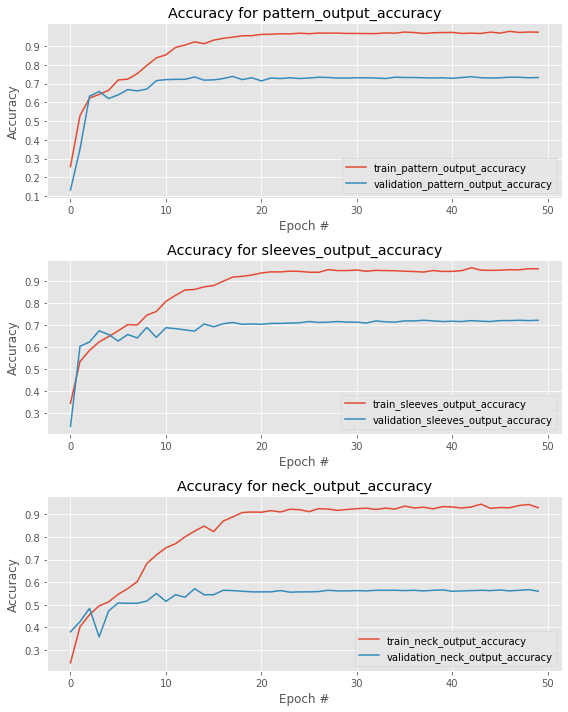

In [29]:
%matplotlib inline
import matplotlib.ticker as ticker

accuracyNames = ["pattern_output_accuracy", "sleeves_output_accuracy", "neck_output_accuracy"]
# plt.yticks(np.arange(0, 1 , 0.1))
plt.style.use("ggplot")
(fig, ax) = plt.subplots(3, 1, figsize=(8, 10))

# loop over the accuracy names
for (i, l) in enumerate(accuracyNames):
	# plot the loss for both the training and validation data
	ax[i].yaxis.set_ticks(np.arange(0, 1, 0.1))
	ax[i].set_title("Accuracy for {}".format(l))
	ax[i].set_xlabel("Epoch #")
	ax[i].set_ylabel("Accuracy")
	ax[i].plot(np.arange(0, EPOCHS), net.training_history.history[l], label='train_'+l)
	ax[i].plot(np.arange(0, EPOCHS), net.training_history.history["val_" + l],
		label="validation_" + l)
	ax[i].legend()
# save the accuracies figure
plt.tight_layout()
plt.savefig("val_losses.png")